In [1]:
#import findspark
#findspark.init()
import pyspark
from pyspark.sql import SparkSession
#spark=SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("Spark SQL basic example").getOrCreate()
sc = spark.sparkContext
import matplotlib.pyplot as plt
import pandas
from pyspark.sql.functions import *

In [2]:
spark

df= spark.read.format("csv").option("header", "true").load(r"D:\DBDA\FINAL_PROJECT\v1\vehicles.csv")

In [3]:
df = spark.read.csv(r"vehicles.csv",header=True, inferSchema=True)

In [4]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- url: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_url: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- VIN: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- size: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- description: string (nullable = true)
 |-- county: string (nullable = true)
 |-- state: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- posting_date: string (nu

In [5]:
df.show(5)

+----------+--------------------+--------------------+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+----+-----+----+----+-----------+---------+-----------+------+-----+----+----+------------+
|        id|                 url|              region|          region_url|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission| VIN|drive|size|type|paint_color|image_url|description|county|state| lat|long|posting_date|
+----------+--------------------+--------------------+--------------------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+----+-----+----+----+-----------+---------+-----------+------+-----+----+----+------------+
|7222695916|https://prescott....|            prescott|https://prescott....| 6000|null|        null| null|     null|     null|null|    null|        null|        null|null| null|null|null|       null|     null|       null|  null|  

In [6]:
df.columns

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [7]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the sum of null values for each column
null_counts = df.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df.columns])

# Show the counts
null_counts.show()


+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
| id| url|region|region_url|price|year|manufacturer|model|condition|cylinders| fuel|odometer|title_status|transmission|   VIN| drive|  size|  type|paint_color|image_url|description|county|state|  lat| long|posting_date|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+------+------+------+------+-----------+---------+-----------+------+-----+-----+-----+------------+
|  0|9884|  6901|      6533| 6446|7890|       28937|17506|   187143|   190798|16344|   17801|       21618|       15932|174486|144178|319997|106892|     143839|    13732|      13733|382283|23077|25397|24715|       22477|
+---+----+------+----------+-----+----+------------+-----+---------+---------+-----+--------+------------+------------+-

In [8]:
df.count()

441802

In [9]:
columns_to_delete = ['id', 'url', 'region_url','VIN','image_url','description','county','lat','long','posting_date','size','state']

# Drop the columns
df1 = df.drop(*columns_to_delete)

# Show the DataFrame after dropping columns
#df1.show()

In [10]:
df1.columns

['region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color']

In [11]:
df1.count()

441802

In [12]:
# drop duplicated records :
df2 = df1.distinct()
df2.count()

376299

df3 = df1.dropDuplicates()
df3.count()

In [13]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the sum of null values for each column
null_counts = df2.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df2.columns])

# Calculate the percentage of null values for each column
total_rows = df2.count()
null_percentages = null_counts.select(
    [((col(column) / total_rows) * 100).alias(column + "_null_percentage") for column in df2.columns]
)

# Show the null percentages
null_percentages.show()


+----------------------+---------------------+--------------------+----------------------------+---------------------+-------------------------+-------------------------+--------------------+------------------------+----------------------------+----------------------------+---------------------+--------------------+---------------------------+
|region_null_percentage|price_null_percentage|year_null_percentage|manufacturer_null_percentage|model_null_percentage|condition_null_percentage|cylinders_null_percentage|fuel_null_percentage|odometer_null_percentage|title_status_null_percentage|transmission_null_percentage|drive_null_percentage|type_null_percentage|paint_color_null_percentage|
+----------------------+---------------------+--------------------+----------------------------+---------------------+-------------------------+-------------------------+--------------------+------------------------+----------------------------+----------------------------+---------------------+------------

We can see that "year", "manufacturer", "model", and "odometer" column has less than 6% of null values. So we can simply drop those rows which have null values in these two columns.

In [14]:
# Drop rows with null values in specified columns
df3 = df2.na.drop(subset=['region','price','year','model','odometer','manufacturer'])

In [15]:
df3.count()

346932

In [16]:
null_count = df3.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df3.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df3.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df3.groupBy('year').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df3.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+-----+
|                year|count|
+--------------------+-----+
| depending on spe...|   28|
|                1953|   55|
|                1957|  117|
|                1987|  393|
|                1956|   98|
|                2016|24145|
|                1936|   21|
|                2020|17024|
|                2012|18901|
|                1958|   49|
|                1943|    1|
|                1915|    1|
|                1972|  298|
|                1931|   26|
|                1988|  410|
|                1926|   10|
|                1938|   14|
|                2019|21961|
| Credit Investiga...|    3|
|                2017|30249|
|                1932|   46|
|                1977|  199|
|                2014|24333|
|                1971|  224|
|                1984|  303|
|                2013|24553|
|                1982|  169|
|                1941|   36|
|  

In [17]:
df3.printSchema()

root
 |-- region: string (nullable = true)
 |-- price: string (nullable = true)
 |-- year: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- cylinders: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- odometer: string (nullable = true)
 |-- title_status: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- drive: string (nullable = true)
 |-- type: string (nullable = true)
 |-- paint_color: string (nullable = true)



For all the missing values in other columns, we have just converted them in to a new category, "unknown"

In [18]:
# Replace null values in all columns with 'unknown'
df4 = df3.fillna('unknown')

In [19]:
# Calculate the sum of null values for each column
null_counts = df4.select([spark_sum(col(column).isNull().cast('int')).alias(column) for column in df4.columns])

# Show the counts
null_counts.show()


+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+
|region|price|year|manufacturer|model|condition|cylinders|fuel|odometer|title_status|transmission|drive|type|paint_color|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+
|     0|    0|   0|           0|    0|        0|        0|   0|       0|           0|           0|    0|   0|          0|
+------+-----+----+------------+-----+---------+---------+----+--------+------------+------------+-----+----+-----------+



In [20]:
null_count = df4.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df4.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df4.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df4.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df4.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+-----+
|        manufacturer|count|
+--------------------+-----+
|              jaguar| 1813|
|               buick| 4753|
|          mitsubishi| 2874|
|             pontiac| 2022|
| pricing and othe...|   40|
|               lexus| 7138|
|              toyota|29054|
|            chrysler| 5103|
| Optional Credit ...|    3|
|               tesla|  812|
|             lincoln| 3764|
|                audi| 6816|
|              datsun|   61|
|                 bmw|12802|
|                jeep|15913|
|               dodge|11137|
|               rover| 1572|
|             hyundai| 8438|
|                ford|60022|
|          alfa-romeo|  859|
|            cadillac| 5911|
|                 ram|14641|
|               mazda| 4702|
|             ferrari|   69|
|                 kia| 6969|
|       mercedes-benz|10083|
|             porsche| 1179|
|        aston-martin|   22|
|  

In [21]:
from pyspark.sql.functions import when

# Define the list of top 20 manufacturers
manufacturer_values = ['nissan','honda','chevrolet','mercedes-benz','ram','dodge','ford','jeep','toyota','bmw','subaru','volkswagen','kia','cadillac','hyundai','lexus','audi','chrysler','acura','buick']

# Use when function to update the 'manufacturer' column
df5 = df4.withColumn('manufacturer', 
                   when(df4['manufacturer'].isin(manufacturer_values), df4['manufacturer'])
                   .otherwise('others'))

In [22]:
null_count = df5.filter(col("manufacturer").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("manufacturer").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('manufacturer').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df5.groupBy('manufacturer').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df5.select("manufacturer").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+-------------+-----+
| manufacturer|count|
+-------------+-----+
|        buick| 4753|
|        lexus| 7138|
|       toyota|29054|
|     chrysler| 5103|
|         audi| 6816|
|       others|46212|
|          bmw|12802|
|         jeep|15913|
|        dodge|11137|
|      hyundai| 8438|
|         ford|60022|
|     cadillac| 5911|
|          ram|14641|
|          kia| 6969|
|mercedes-benz|10083|
|    chevrolet|46111|
|        honda|18088|
|   volkswagen| 8283|
|        acura| 5469|
|       nissan|15796|
|       subaru| 8193|
+-------------+-----+

None
--------------------------------------
+-------------+
| manufacturer|
+-------------+
|        buick|
|        lexus|
|       toyota|
|     chrysler|
|         audi|
|       others|
|          bmw|
|         jeep|
|        dodge|
|      hyundai|
|         ford|
|     cadillac|
|          ram|
|          kia|
|mercedes-benz|
|    chevrolet|
|  

# region :

In [23]:
null_count = df5.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df5.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df5.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df5.groupBy('region').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df5.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+-----+
|              region|count|
+--------------------+-----+
|   central louisiana|  116|
|          western KY|  205|
|           texarkana|  189|
|       daytona beach| 1237|
|   heartland florida|  154|
|  southeast missouri|  176|
|            sandusky|  231|
|        gold country|  689|
|           pensacola|  560|
|        south jersey| 2438|
|       new hampshire| 2217|
|          san marcos|  169|
|           fairbanks|  288|
|     kansas city, MO| 2439|
|          harrisburg|  783|
|       state college|  191|
|              yakima| 1453|
|          moses lake|  816|
|huntsville / decatur| 1072|
|   northern michigan|  557|
|       south florida| 2328|
|saginaw-midland-b...|  821|
|potsdam-canton-ma...|   86|
|        northwest OK|  136|
|             jackson| 1083|
| dallas / fort worth| 2473|
|  mcallen / edinburg|  796|
|         long island| 2555|
|  

+--------------------+
|              region|
+--------------------+
|           texarkana|
|        gold country|
|           fairbanks|
|huntsville / decatur|
|florence / muscle...|
|             modesto|
|     imperial county|
|       inland empire|
|              mobile|
|               chico|
|     kenai peninsula|
|           jonesboro|
|    southeast alaska|
|    mendocino county|
|            show low|
|         little rock|
|          tuscaloosa|
|    hanford-corcoran|
|          fort smith|
|  flagstaff / sedona|
+--------------------+
only showing top 20 rows

416


In [24]:
from pyspark.sql.functions import when

# Count the occurrences of each manufacturer value
manufacturer_counts = df5.groupBy('region').count()

# Sort the counts in descending order and select the top 20 manufacturers
top_manufacturers = manufacturer_counts.orderBy('count', ascending=False).limit(50)

# Extract the top 20 manufacturer values
manufacturer_values = [row['region'] for row in top_manufacturers.collect()]

# Use when function to update the 'manufacturer' column
df6 = df5.withColumn('region', 
                     when(df5['region'].isin(manufacturer_values), df5['region'])
                     .otherwise('others'))


In [25]:
null_count = df6.filter(col("region").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("region").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('region').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('region').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("region").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+------+
|              region| count|
+--------------------+------+
|        south jersey|  2438|
|     kansas city, MO|  2439|
| dallas / fort worth|  2473|
|         long island|  2555|
|             atlanta|  2460|
|        jacksonville|  2636|
|             chicago|  2627|
|      seattle-tacoma|  2758|
|              denver|  2698|
|       inland empire|  2345|
|      tampa bay area|  2495|
|            stockton|  2554|
|           charlotte|  2383|
|          cincinnati|  2473|
|       orange county|  2546|
|        st louis, MO|  2469|
|    colorado springs|  2420|
|               boise|  2329|
|              boston|  2617|
|          pittsburgh|  2490|
|             orlando|  2471|
|           milwaukee|  2446|
|        grand rapids|  2524|
|              others|221186|
|      washington, DC|  2548|
|       oklahoma city|  2344|
|           las vegas|  2382|
| 

# model :

In [26]:
null_count = df6.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df6.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df6.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df6.groupBy('model').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df6.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+-----+
|               model|count|
+--------------------+-----+
|             4runner|  903|
|                 hse|   55|
|       sonata hybrid|   73|
|                hr-v|  146|
|compass fwd dr sport|    2|
|                 dts|  239|
|            lacrosse|  358|
|          crv lx awd|   22|
|         verano base|   11|
|transit connect c...|   26|
|           sentra sv|  155|
|  cherokee trailhawk|   25|
|journey r/t flexible|    2|
|           pruis two|    2|
|silverado 2500hd ...|    5|
|                 xk8|   25|
|          charger se|   59|
|journey se sport ...|   34|
|            aerostar|    5|
|      avalon limited|   60|
|           cts sedan|   46|
|                 q40|    8|
|  f 250 platinum fx4|    4|
|      f-150 long bed|    1|
|               azera|   50|
|silverado durmax ...|   12|
|        slt crew cab|    4|
|explorer limited 4wd|   14|
|xc

+--------------------+
|               model|
+--------------------+
|            lacrosse|
|             4runner|
|                 dts|
|           cts sedan|
|                 hse|
|super duty f-350 ...|
|                 xk8|
|                hr-v|
|       sonata hybrid|
|          charger se|
|      avalon limited|
|         2500 diesel|
|               gem 2|
|               azera|
|transit connect c...|
|  cherokee trailhawk|
|   eclipse cross sel|
|           sentra sv|
|          crv lx awd|
|                m 37|
+--------------------+
only showing top 20 rows

23551


In [27]:
from pyspark.sql.functions import when

# Count the occurrences of each model value
manufacturer_counts = df6.groupBy('model').count()

# Sort the counts in descending order and select the top 50 model
top_manufacturers = manufacturer_counts.orderBy('count', ascending=False).limit(50)

# Extract the top 50 model values
manufacturer_values = [row['model'] for row in top_manufacturers.collect()]

# Use when function to update the 'model' column
df7 = df6.withColumn('model',
                     when(df6['model'].isin(manufacturer_values), df6['model'])
                     .otherwise('others'))


In [28]:
null_count = df7.filter(col("model").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("model").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('model').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('model').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("model").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+------------------+------+
|             model| count|
+------------------+------+
|              1500|  3345|
|            sentra|  1059|
|  silverado 2500hd|  1302|
|            altima|  2159|
|            sierra|  1046|
|     grand caravan|  1340|
|            camaro|  1015|
|          forester|  1120|
|            fusion|  1556|
|             prius|  1219|
|         silverado|  2502|
|             jetta|  1188|
|            tacoma|  2050|
|            tundra|  1177|
|          suburban|   925|
|            sonata|  1326|
|             tahoe|  1406|
|              2500|  2243|
|            others|262576|
|           corolla|  1765|
|             focus|  1482|
|       sierra 1500|  1335|
|              cr-v|  1595|
|          wrangler|  2155|
|            sienna|   908|
|            escape|  2244|
|             rogue|  1045|
|              3500|  1278|
|             cruze|  1245|
|     

In [29]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df7.columns:
    # Count the distinct values in the column
    distinct_count = df7.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 15286
year 119
manufacturer 21
model 51
condition 58
cylinders 33
fuel 17
odometer 101992
title_status 19
transmission 82
drive 12
type 22
paint_color 49


In [30]:
null_count = df7.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df7.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df7.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df7.groupBy('transmission').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df7.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346932
total count  346932
--------------------------------------
+--------------------+------+
|        transmission| count|
+--------------------+------+
|             unknown|  1327|
| and smog fees   ...|     1|
|           automatic|267924|
|               other| 58572|
|2021-05-01T11:30:...|     1|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|         -122.332289|     3|
|              manual| 19017|
| and smog fees   ...|     1|
| and smog fees   ...|     1|
|2021-05-02T13:04:...|     1|
|2021-05-02T14:34:...|     1|
| and smog fees   ...|     1|
|2021-04-27T14:34:...|     1|
|2021-05-03T15:20:...|     1|
|2021-05-01T13:05:...|     1|
| and smog fees   ...|     1|
|2021-04-27T15:19:...|     1|
| Si se encuentra ...|     1|
| and smog fees   ...|     1|
|           Extended |     1|
|          -73.900821|    12|
|2021-05-02T15:19:...|     1|
| and smog fees   ...|     1|
|2021-05-01T15:19:...|     1|
|2021-04-27T09:58:...|     1|
|2

In [31]:
#Define a list of values to match
names_to_match = ['automatic','manual','other','unknown']
 
#Filter DataFrame to select rows where name is in the list of values or is null
df8 = df7.filter((col("transmission").isin(names_to_match)) )

In [32]:
null_count = df8.filter(col("transmission").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("transmission").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('transmission').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('transmission').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("transmission").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346840
total count  346840
--------------------------------------
+------------+------+
|transmission| count|
+------------+------+
|     unknown|  1327|
|   automatic|267924|
|       other| 58572|
|      manual| 19017|
+------------+------+

None
--------------------------------------
+------------+
|transmission|
+------------+
|     unknown|
|   automatic|
|       other|
|      manual|
+------------+

4


In [33]:
null_count = df8.filter(col("drive").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("drive").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('drive').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('drive').count()
print(value_counts.show(900))

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("drive").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346840
total count  346840
--------------------------------------
+-------+------+
|  drive| count|
+-------+------+
|unknown|103160|
|    fwd| 86537|
|    rwd| 48135|
|    4wd|109008|
+-------+------+

None
--------------------------------------
+-------+
|  drive|
+-------+
|unknown|
|    fwd|
|    rwd|
|    4wd|
+-------+

4


In [34]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df8.columns:
    # Count the distinct values in the column
    distinct_count = df8.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 15274
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


In [35]:
df8.describe()

DataFrame[summary: string, region: string, price: string, year: string, manufacturer: string, model: string, condition: string, cylinders: string, fuel: string, odometer: string, title_status: string, transmission: string, drive: string, type: string, paint_color: string]

In [36]:
null_count = df8.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df8.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df8.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df8.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df8.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346840
total count  346840
--------------------------------------
+----+-----+
|year|count|
+----+-----+
|1953|   55|
|1957|  117|
|1987|  393|
|1956|   98|
|2016|24145|
|1936|   21|
|2020|17024|
|2012|18901|
|1958|   49|
|1943|    1|
|1915|    1|
|1972|  298|
|1931|   26|
|1988|  410|
|1926|   10|
|1938|   14|
|2019|21961|
|2017|30249|
|1932|   46|
|1977|  199|
+----+-----+
only showing top 20 rows

None
--------------------------------------
+----+
|year|
+----+
|1953|
|1957|
|1987|
|1956|
|2016|
|1936|
|2020|
|2012|
|1958|
|1972|
|1931|
|1988|
|1938|
|2019|
|1918|
|2017|
|1932|
|1977|
|2014|
|1971|
+----+
only showing top 20 rows

107


In [37]:
df8.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: string (nullable = false)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: string (nullable = false)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



In [38]:
# converting odometer to integer type:

# Convert data type from string to integer
df9 = df8.withColumn("year", col('year').cast("int"))

# Show the DataFrame schema to verify the changes
df9.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: string (nullable = false)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



from pyspark.sql.functions import to_timestamp, year

# Assuming df is your Spark DataFrame with a column named 'timestamp_str' of string type
# Convert the string column to a timestamp column
df9 = df8.withColumn('year', to_timestamp(df8['year'], 'yyyy-MM-dd HH:mm:ss'))

# Extract the year from the timestamp column
df9 = df8.withColumn('year', year(df8['year']))


In [39]:
null_count = df9.filter(col("year").isNull()).count()
print("null records" ,null_count)

null_count = df9.filter(col("year").isNotNull()).count()
print("not null records" ,null_count)

total_count = df9.select('year').count()

print("total count ",total_count)

print("--------------------------------------")

value_counts = df9.groupBy('year').count()
print(value_counts.show())

print("--------------------------------------")

# Get unique records of a specific column
unique_records = df9.select("year").distinct()

# Show the unique records
unique_records.show()

# Count the number of unique records
count_unique_records = unique_records.count()
print(count_unique_records)

null records 0
not null records 346840
total count  346840
--------------------------------------
+----+-----+
|year|count|
+----+-----+
|1959|   55|
|1990|  494|
|1975|  134|
|1977|  199|
|1924|    6|
|2003| 5939|
|2007|11938|
|2018|31616|
|1974|  183|
|2015|25217|
|1927|   26|
|1955|  135|
|2006|10205|
|1978|  260|
|2022|   69|
|1961|   50|
|2013|24553|
|1942|    6|
|1939|   32|
|1952|   65|
+----+-----+
only showing top 20 rows

None
--------------------------------------
+----+
|year|
+----+
|1959|
|1990|
|1975|
|1977|
|1924|
|2003|
|2007|
|2018|
|1974|
|2015|
|1927|
|1955|
|2006|
|1978|
|1961|
|2013|
|1942|
|1939|
|1922|
|1952|
+----+
only showing top 20 rows

107


# odometer :

In [40]:
# converting odometer to integer type:

# Convert data type from string to integer
df10 = df9.withColumn("odometer", col('odometer').cast("int"))

# Show the DataFrame schema to verify the changes
df10.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: string (nullable = false)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



# PRICE :

In [41]:
# converting odometer to integer type:

# Convert data type from string to integer
df11 = df10.withColumn("price", col('price').cast("int"))

# Show the DataFrame schema to verify the changes
df11.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)



In [42]:
df11.show(10)

+------+-----+----+------------+--------------+---------+-----------+-------+--------+------------+------------+-------+-------+-----------+
|region|price|year|manufacturer|         model|condition|  cylinders|   fuel|odometer|title_status|transmission|  drive|   type|paint_color|
+------+-----+----+------------+--------------+---------+-----------+-------+--------+------------+------------+-------+-------+-----------+
|others|39590|2020|        ford|        others|     good|8 cylinders|    gas|    1419|       clean|       other|    rwd|  coupe|      white|
|others| 3850|2010|  volkswagen|         jetta|  unknown|    unknown|    gas|  178000|       clean|   automatic|unknown|unknown|    unknown|
|others|45950|2014|      others|        others|excellent|8 cylinders| diesel|  154289|       clean|   automatic|    4wd|  truck|      black|
|others|33990|2016|   chevrolet|silverado 1500|  unknown|8 cylinders|unknown|  117895|       clean|   automatic|    4wd| pickup|      white|
|others| 5000

In [43]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df11.columns:
    # Count the distinct values in the column
    distinct_count = df11.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 15272
year 107
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 101980
title_status 7
transmission 4
drive 4
type 14
paint_color 13


Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.

# for price quartiles :

In [44]:
df11.count()

346840

In [45]:
# Calculate quartiles
price_percentiles = df11.approxQuantile("price", [0.15, 0.75], 0.01)  # Use a low relative error for better accuracy
price_percentile15 = price_percentiles[0]
price_percentile75 = price_percentiles[1]

# Calculate IQR and upper/lower limits
price_iqr = price_percentile75 - price_percentile15
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = price_percentile15

# Filter DataFrame based on limits
df12 = df11.filter((col("price") < price_upper_limit) & (col("price") > price_lower_limit))

In [46]:
df12.count()

289883

# for odometer quartiles :

In [47]:
# Calculate percentiles
odometer_percentiles = df12.approxQuantile("odometer", [0.05, 0.25, 0.75], 0.01)  # Use a low relative error for better accuracy
odometer_percentile05 = odometer_percentiles[0]
odometer_percentile25 = odometer_percentiles[1]
odometer_percentile75 = odometer_percentiles[2]

# Calculate IQR and upper/lower limits
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = odometer_percentile05

# Filter DataFrame based on limits
df13 = df12.filter((col("odometer") < odometer_upper_limit) & (col("odometer") > odometer_lower_limit))

In [50]:
df13.count()

272791

# Feature Engineering :

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

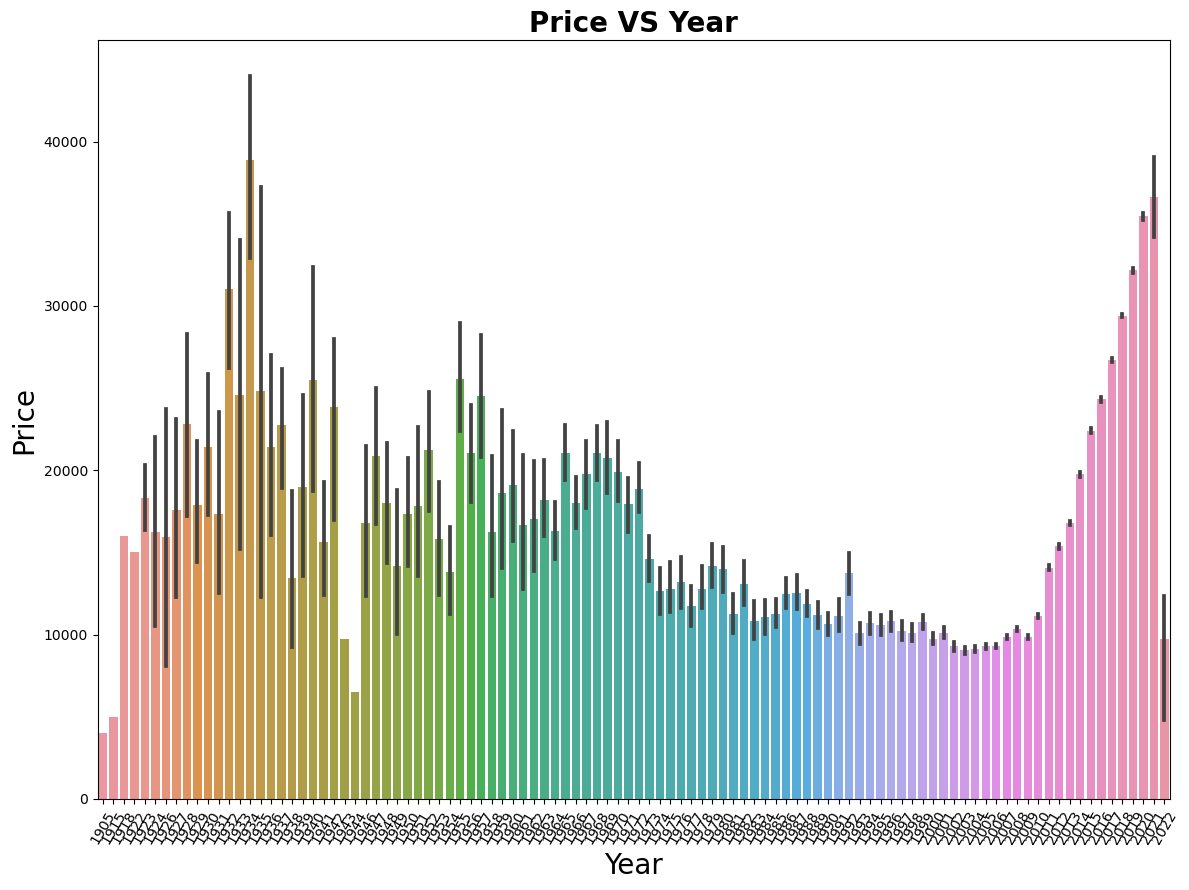

In [49]:
new_df = df13.select("price","year").toPandas()

# Set up plot parameters
plt.rcParams["figure.autolayout"] = True
sns.set_palette('summer_r')
plt.figure(figsize=(12, 9))

# Plot
sns.barplot(y=new_df['price'], x=new_df['year'])
plt.title("Price VS Year", fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=20)
plt.xticks(rotation=60)
plt.ylabel('Price', fontsize=20)
plt.tight_layout()
plt.show()

We can see the car data before 1996 is quiet irrelevant with our current times data. So we are extracting all the car data available after 1996

In [50]:
# Filter DataFrame based on the condition
df14 = df13.where(df13['year'] > 1996)

In [51]:
from pyspark.sql.functions import countDistinct

# Iterate over each column in the DataFrame
for col_name in df14.columns:
    # Count the distinct values in the column
    distinct_count = df14.select(countDistinct(col_name)).collect()[0][0]
    print(col_name, distinct_count)

region 51
price 12648
year 26
manufacturer 21
model 51
condition 7
cylinders 9
fuel 6
odometer 83924
title_status 7
transmission 4
drive 4
type 14
paint_color 13


In [52]:
df14.count()

264038

In [53]:
# Calculate car age and add it as a new column
df15 = df14.withColumn('car_age', 2022 - col('year'))

# Drop the 'year' column
df16 = df15.drop('year')

# Describe the DataFrame to get summary statistics
df16.describe().show()

+-------+--------------+------------------+------------+------------------+---------+------------+-------+------------------+------------+------------+-------+------+-----------+-----------------+
|summary|        region|             price|manufacturer|             model|condition|   cylinders|   fuel|          odometer|title_status|transmission|  drive|  type|paint_color|          car_age|
+-------+--------------+------------------+------------+------------------+---------+------------+-------+------------------+------------+------------+-------+------+-----------+-----------------+
|  count|        264038|            264038|      264038|            264038|   264038|      264038| 264038|            264038|      264038|      264038| 264038|264038|     264038|           264038|
|   mean|          null|19676.750384414365|        null|2158.5919757759275|     null|        null|   null| 90331.25469440005|        null|        null|   null|  null|       null| 9.06306289246245|
| stddev|      

In [54]:
df16.printSchema()

root
 |-- region: string (nullable = false)
 |-- price: integer (nullable = true)
 |-- manufacturer: string (nullable = false)
 |-- model: string (nullable = false)
 |-- condition: string (nullable = false)
 |-- cylinders: string (nullable = false)
 |-- fuel: string (nullable = false)
 |-- odometer: integer (nullable = true)
 |-- title_status: string (nullable = false)
 |-- transmission: string (nullable = false)
 |-- drive: string (nullable = false)
 |-- type: string (nullable = false)
 |-- paint_color: string (nullable = false)
 |-- car_age: integer (nullable = true)



In [55]:
df16.count()

264038

### MODELS

In [56]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,StandardScaler
from pyspark.ml.regression import LinearRegression,RandomForestRegressor,DecisionTreeRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [57]:
train, test = df16.randomSplit([0.8, 0.2])

In [58]:
numerical=["odometer","car_age"]

In [59]:
numerical_vector_assembler = VectorAssembler(inputCols=numerical,
                                             outputCol='numerical_feature_vector')

train = numerical_vector_assembler.transform(train)
test = numerical_vector_assembler.transform(test)

In [60]:
scaler = StandardScaler(inputCol='numerical_feature_vector',
                        outputCol='scaled_numerical_feature_vector',
                        withStd=True, withMean=True)

scaler = scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [61]:
indexer = StringIndexer(inputCols=['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','region'],
                        outputCols=['manufacturer_index','m_i','co_i','cy_i','f_i','ts_i','tr_i','d_i','ty_i','p_i','r_i'],handleInvalid="keep")

indexer = indexer.fit(train)
train = indexer.transform(train)
test = indexer.transform(test)

In [62]:
one_hot_encoder = OneHotEncoder(inputCols=['manufacturer_index','m_i','co_i','cy_i','f_i','ts_i','tr_i','d_i','ty_i','p_i','r_i'],
                                outputCols=['manufacturer_index_h','m_i_h','co_i_h','cy_i_h','f_i_h','ts_i_h','tr_i_h','d_i_h','ty_i_h','p_i_h','r_i_h'])

one_hot_encoder = one_hot_encoder.fit(train)

train = one_hot_encoder.transform(train)
test = one_hot_encoder.transform(test)

In [63]:
assembler = VectorAssembler(inputCols=['scaled_numerical_feature_vector',
                                       'manufacturer_index_h','m_i_h','co_i_h','cy_i_h','f_i_h','ts_i_h','tr_i_h','d_i_h','ty_i_h','p_i_h','r_i_h'],
                            outputCol='final_feature_vector')

train = assembler.transform(train)
test = assembler.transform(test)

### linear regression

In [64]:
lr = LinearRegression(featuresCol='final_feature_vector',
                      labelCol='price')

In [65]:
lr=lr.fit(train)

In [68]:
#pred_train_df = lr.transform(train).withColumnRenamed('prediction',
                                                      #'predicted_vehicle_value')

#pred_train_df.show(5)

In [66]:
pred_test_df = lr.transform(test).withColumnRenamed('prediction', 'predicted_vehicle_value')

In [67]:
result=lr.evaluate(test)

In [68]:
print(result.r2)

0.7399288635023604


In [69]:
unlabeled_data=test.select("final_feature_vector")

In [70]:
predictions=lr.transform(unlabeled_data)

In [71]:
predictions.show()

+--------------------+------------------+
|final_feature_vector|        prediction|
+--------------------+------------------+
|(189,[0,1,6,33,75...| 952.6364900043263|
|(189,[0,1,10,23,7...|2158.3586207069966|
|(189,[0,1,6,31,75...|2569.3654463781204|
|(189,[0,1,16,23,7...| 5562.536391174108|
|(189,[0,1,2,23,76...|  3903.78256031451|
|(189,[0,1,6,31,75...|12861.490566730623|
|(189,[0,1,7,23,76...|  19934.9269288759|
|(189,[0,1,7,23,74...|19148.330935823436|
|(189,[0,1,2,23,76...|15226.907883437842|
|(189,[0,1,5,29,76...|1534.5631734044764|
|(189,[0,1,6,23,76...| 12735.33553604588|
|(189,[0,1,12,23,7...|13340.843209386854|
|(189,[0,1,13,23,7...| 822.1754530154685|
|(189,[0,1,15,23,7...| 9808.212725013365|
|(189,[0,1,6,23,76...|15123.009753011425|
|(189,[0,1,3,23,76...|14752.376818199127|
|(189,[0,1,5,39,74...|16144.914469314255|
|(189,[0,1,6,52,74...| 16536.06132838588|
|(189,[0,1,2,23,76...|16077.565777253465|
|(189,[0,1,18,23,7...|12134.431510711005|
+--------------------+------------

### random forest

In [72]:
rf = RandomForestRegressor(featuresCol='final_feature_vector',
                      labelCol='price')

In [73]:
rf = rf.fit(train)

In [74]:
predictions = rf.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

# Evaluate the model
r2 = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

# Print the evaluation metrics
print("R2 on test data = %g" % r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)

# Show predictions
predictions.select("final_feature_vector", "price", "prediction").show()

R2 on test data = 0.679929
Mean squared error: 47898729.30206803
Mean absolute error: 5196.818236356337
Root mean squared error: 6920.890788191072
+--------------------+-----+------------------+
|final_feature_vector|price|        prediction|
+--------------------+-----+------------------+
|(189,[0,1,6,33,75...| 4000| 7700.640558303759|
|(189,[0,1,10,23,7...| 5500| 9912.294339132315|
|(189,[0,1,6,31,75...| 5900| 8413.041712497881|
|(189,[0,1,16,23,7...| 5950|10080.266136649885|
|(189,[0,1,2,23,76...| 6200|  8510.58495089824|
|(189,[0,1,6,31,75...| 6500|  9912.75322050849|
|(189,[0,1,7,23,76...| 6500|22901.654451503884|
|(189,[0,1,7,23,74...| 6800| 21766.78568858675|
|(189,[0,1,2,23,76...| 7200| 19829.90715193745|
|(189,[0,1,5,29,76...| 7888| 8417.644801792614|
|(189,[0,1,6,23,76...| 8200|19070.807926300804|
|(189,[0,1,12,23,7...| 8995|15029.972252491318|
|(189,[0,1,13,23,7...| 9000|  9257.53939211978|
|(189,[0,1,15,23,7...|10500|12078.102179051753|
|(189,[0,1,6,23,76...|11000|13774.676

### decision tree

In [75]:
# Define Decision Tree Regressor
dt = DecisionTreeRegressor(featuresCol='final_feature_vector',
                      labelCol='price')

# Train the model
dt = dt.fit(train)

# Make predictions
predictions = dt.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

# Print the evaluation metrics
print("R2 on test data = %g" % r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)

# Show predictions
predictions.select("final_feature_vector", "price", "prediction").show()

R2 on test data = 0.642447
Mean squared error: 53507866.78618535
Mean absolute error: 5408.150657553237
Root mean squared error: 7314.9071618295575
+--------------------+-----+------------------+
|final_feature_vector|price|        prediction|
+--------------------+-----+------------------+
|(189,[0,1,6,33,75...| 4000| 7783.550723500013|
|(189,[0,1,10,23,7...| 5500| 10877.20725235849|
|(189,[0,1,6,31,75...| 5900| 7783.550723500013|
|(189,[0,1,16,23,7...| 5950| 10877.20725235849|
|(189,[0,1,2,23,76...| 6200| 7783.550723500013|
|(189,[0,1,6,31,75...| 6500| 7783.550723500013|
|(189,[0,1,7,23,76...| 6500| 20087.06698999697|
|(189,[0,1,7,23,74...| 6800| 25493.25321807168|
|(189,[0,1,2,23,76...| 7200| 20087.06698999697|
|(189,[0,1,5,29,76...| 7888| 7783.550723500013|
|(189,[0,1,6,23,76...| 8200|15472.616068122918|
|(189,[0,1,12,23,7...| 8995| 7783.550723500013|
|(189,[0,1,13,23,7...| 9000| 7783.550723500013|
|(189,[0,1,15,23,7...|10500|11478.405063291139|
|(189,[0,1,6,23,76...|11000|11478.40

### ridge regression

In [76]:
# Define Ridge Regression model
ridge = LinearRegression(featuresCol="final_feature_vector", labelCol="price", elasticNetParam=0.0, regParam=0.1) # regParam is the regularization parameter for Ridge Regression

# Train the model
ridge_model = ridge.fit(train)

# Make predictions
predictions = ridge_model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("R2 on test data = %g" % r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
# Show predictions
predictions.select("final_feature_vector", "price", "prediction").show()

R2 on test data = 0.739929
Mean squared error: 38919690.09311411
Mean absolute error: 4621.678788599652
Root mean squared error: 6238.564746246857
+--------------------+-----+------------------+
|final_feature_vector|price|        prediction|
+--------------------+-----+------------------+
|(189,[0,1,6,33,75...| 4000| 952.7152604983385|
|(189,[0,1,10,23,7...| 5500|2158.4725291491886|
|(189,[0,1,6,31,75...| 5900| 2569.425448773174|
|(189,[0,1,16,23,7...| 5950| 5562.605076664899|
|(189,[0,1,2,23,76...| 6200|3903.8982262258087|
|(189,[0,1,6,31,75...| 6500|12861.464215626405|
|(189,[0,1,7,23,76...| 6500|19934.925891005394|
|(189,[0,1,7,23,74...| 6800|19148.318495536372|
|(189,[0,1,2,23,76...| 7200|15226.973850366434|
|(189,[0,1,5,29,76...| 7888| 1534.679714404021|
|(189,[0,1,6,23,76...| 8200|12735.307506970828|
|(189,[0,1,12,23,7...| 8995|13340.943466248576|
|(189,[0,1,13,23,7...| 9000| 822.2486125681498|
|(189,[0,1,15,23,7...|10500|  9808.25831800762|
|(189,[0,1,6,23,76...|11000|15122.995

### lasso regression

In [77]:
# Define Ridge Regression model
lasso = LinearRegression(featuresCol="final_feature_vector", labelCol="price", elasticNetParam=1.0, regParam=0.1) # regParam is the regularization parameter for Ridge Regression

# Train the model
las_model = lasso.fit(train)

# Make predictions
predictions = las_model.transform(test)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("R2 on test data = %g" % r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
# Show predictions
predictions.select("final_feature_vector", "price", "prediction").show()

R2 on test data = 0.739928
Mean squared error: 38919800.454389304
Mean absolute error: 4621.657633513589
Root mean squared error: 6238.57359132593
+--------------------+-----+------------------+
|final_feature_vector|price|        prediction|
+--------------------+-----+------------------+
|(189,[0,1,6,33,75...| 4000| 952.2337648849825|
|(189,[0,1,10,23,7...| 5500|2157.4797327407105|
|(189,[0,1,6,31,75...| 5900| 2568.221487931307|
|(189,[0,1,16,23,7...| 5950| 5560.758705152664|
|(189,[0,1,2,23,76...| 6200| 3903.108765986899|
|(189,[0,1,6,31,75...| 6500| 12860.72740473432|
|(189,[0,1,7,23,76...| 6500|19934.644343897526|
|(189,[0,1,7,23,74...| 6800|19147.099080867694|
|(189,[0,1,2,23,76...| 7200|15224.313194789296|
|(189,[0,1,5,29,76...| 7888|1536.1656570204905|
|(189,[0,1,6,23,76...| 8200|12735.232452217237|
|(189,[0,1,12,23,7...| 8995|13339.435421951755|
|(189,[0,1,13,23,7...| 9000| 823.5977937297612|
|(189,[0,1,15,23,7...|10500| 9808.651751653046|
|(189,[0,1,6,23,76...|11000|15122.887

### gradient boosting

In [78]:
from sparkxgb import XGBoostRegressor
#import findspark findspark.init()

In [79]:
from pyspark.ml.regression import GBTRegressor

In [80]:
# Train XGBoost model
gbt = GBTRegressor(featuresCol="final_feature_vector", labelCol="price", maxIter=200)
model = gbt.fit(train)

# Make predictions
predictions = model.transform(test)


# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print("R2 on test data = %g" % r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
# Show predictions
predictions.select("final_feature_vector", "price", "prediction").show()

R2 on test data = 0.837408
Mean squared error: 24331905.403501533
Mean absolute error: 3405.387979622809
Root mean squared error: 4932.738124358674
+--------------------+-----+------------------+
|final_feature_vector|price|        prediction|
+--------------------+-----+------------------+
|(189,[0,1,6,33,75...| 4000| 4285.770391449284|
|(189,[0,1,10,23,7...| 5500| 5753.147822000039|
|(189,[0,1,6,31,75...| 5900|5191.2153008413325|
|(189,[0,1,16,23,7...| 5950|  6812.05316154469|
|(189,[0,1,2,23,76...| 6200| 5107.593912980362|
|(189,[0,1,6,31,75...| 6500|  8146.86582606256|
|(189,[0,1,7,23,76...| 6500| 17100.99090919061|
|(189,[0,1,7,23,74...| 6800|15918.599057908008|
|(189,[0,1,2,23,76...| 7200|14260.848368000547|
|(189,[0,1,5,29,76...| 7888| 6103.483581008552|
|(189,[0,1,6,23,76...| 8200| 7167.394375478592|
|(189,[0,1,12,23,7...| 8995| 9424.200352637596|
|(189,[0,1,13,23,7...| 9000| 4787.163401474646|
|(189,[0,1,15,23,7...|10500| 10331.91170091832|
|(189,[0,1,6,23,76...|11000|10873.54

### tunned gradient boosting

In [81]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


In [82]:
gbt = GBTRegressor(featuresCol="final_feature_vector", labelCol="price", maxIter=200)

In [ ]:
# Define a range of maxBins values to explore
maxBins_range = [2, 4, 8, 16, 32, 64, 100]

# Define a grid of hyperparameters to search
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxBins, maxBins_range)
             .build())

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")


# Initialize CrossValidator
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Train model with CrossValidator
cvModel = cv.fit(train)

# Make predictions on test data
predictions = cvModel.transform(test)

# Evaluate the model
rmse = evaluator.evaluate(predictions)
print("R2 on test data =", r2)

# Best model hyperparameters
bestModel = cvModel.bestModel
print("Best Max Bins:", bestModel.getMaxBins())